In [48]:
import numpy as np

In [49]:
x = np.array([[1,2,3,4,5,6]])
y = np.array([[0,3,6,9,12,15]])

In [50]:
np.corrcoef(x,y)

array([[1., 1.],
       [1., 1.]])

In [51]:
np.cov(x,y)

array([[ 3.5, 10.5],
       [10.5, 31.5]])

In [52]:
import matplotlib.pyplot as plt

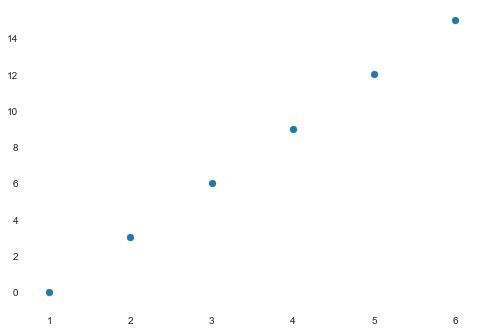

In [53]:
plt.scatter(x,y)

## Univariate selection

In [54]:
# feature selection with univariate statistical tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif,f_regression,chi2,f_oneway
from sklearn.feature_selection import GenericUnivariateSelect,SelectPercentile,SelectFdr,SelectFwe


In [55]:
# loading dataset
filename = "https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/pima-indians-diabetes.csv"
dataframe = read_csv(filename)

In [56]:
dataframe

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [57]:
df = dataframe

In [58]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [59]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [60]:
import pandas_profiling

In [61]:
pandas_profiling.ProfileReport(df)

In [62]:
import seaborn as sns

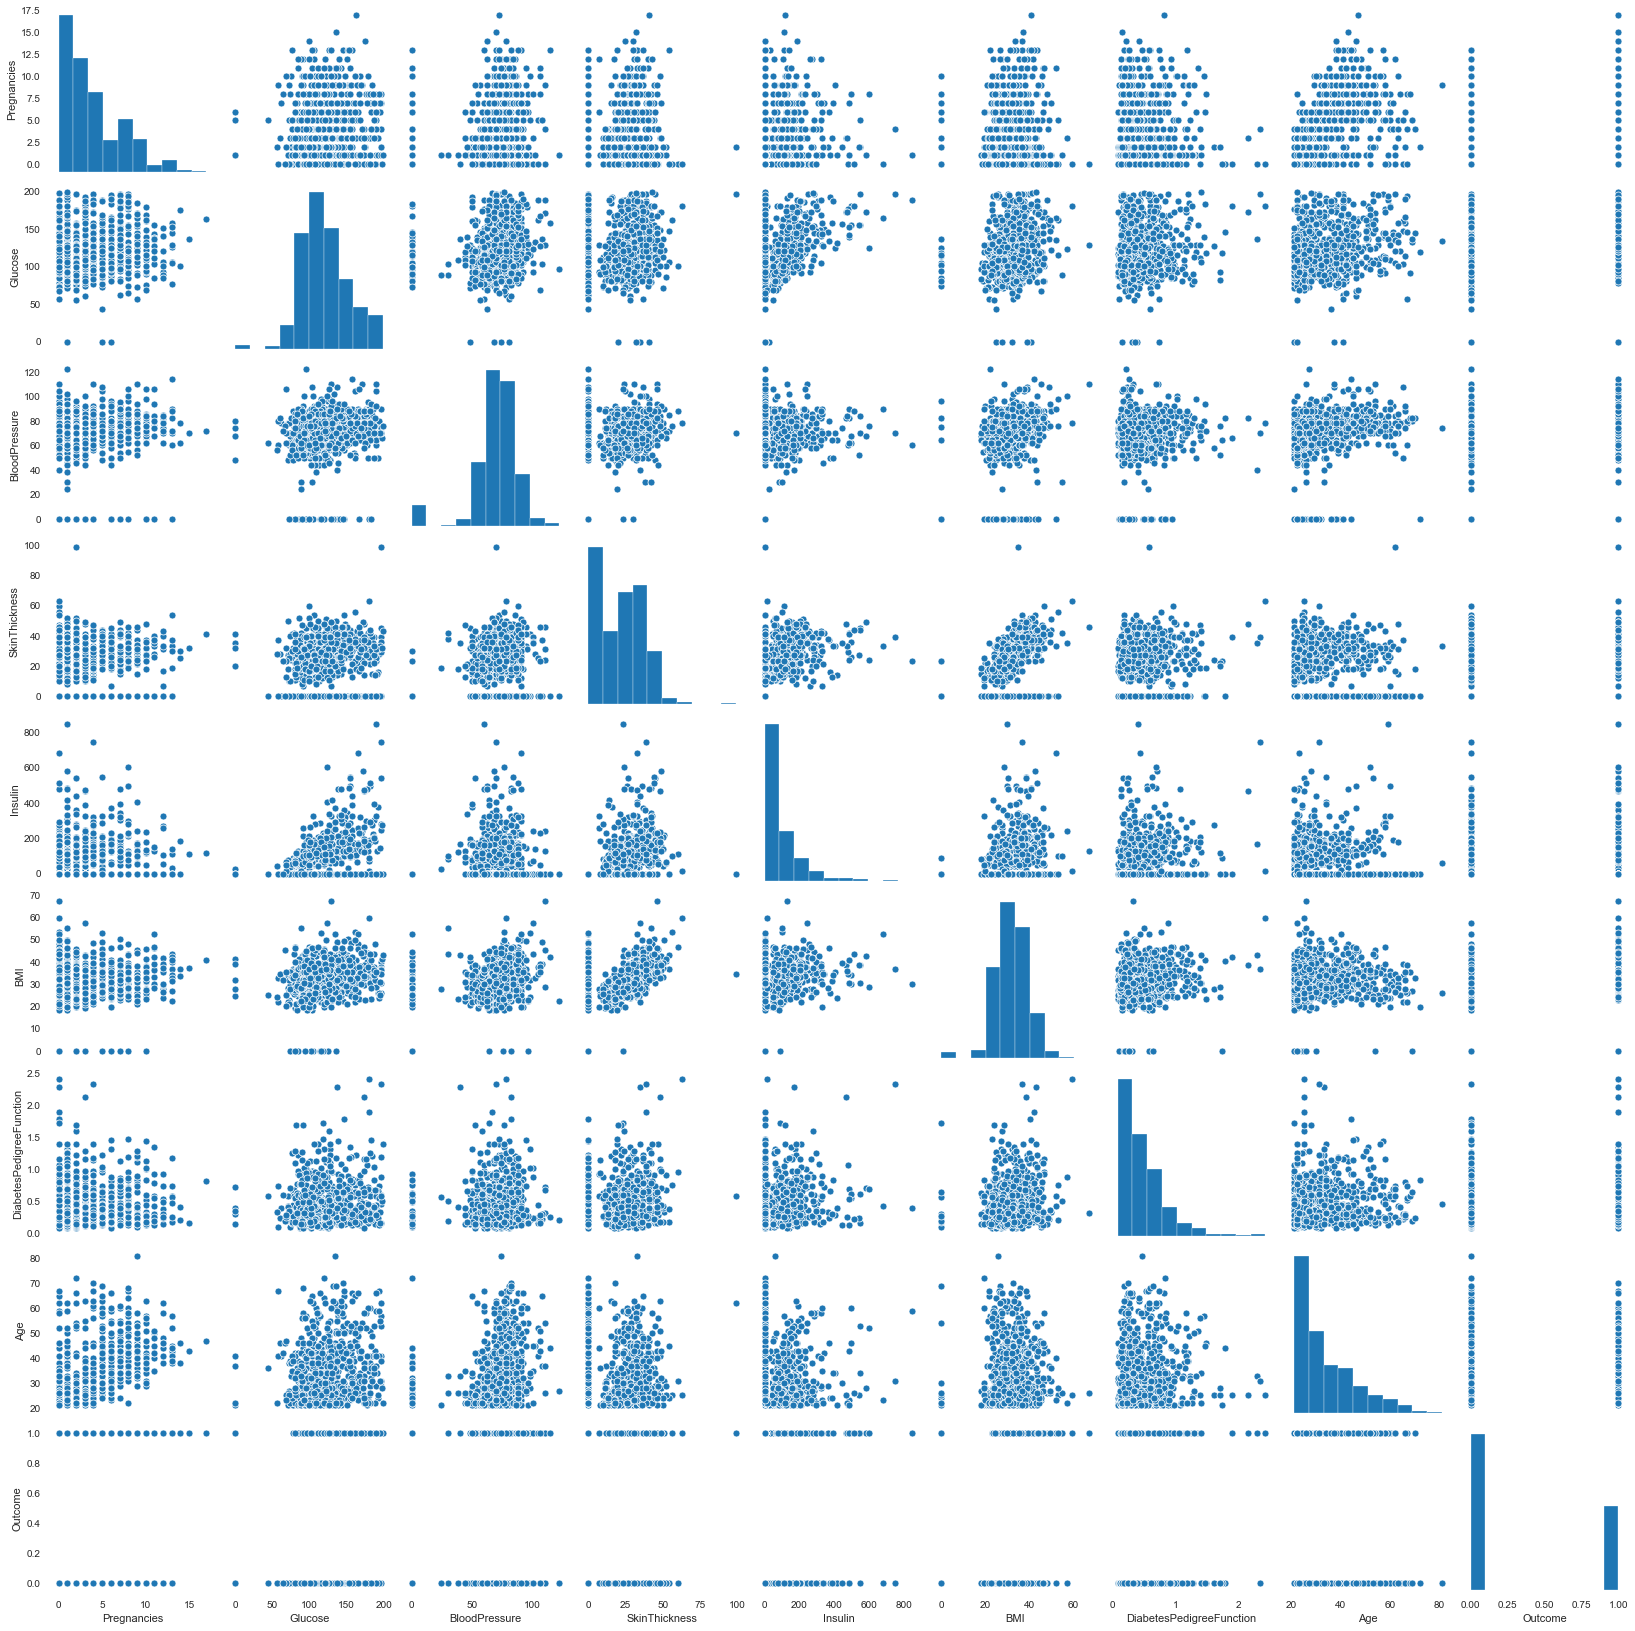

In [63]:
sns.pairplot(df)

In [64]:
array = df.values

In [65]:
x = array[:,0:8]
y = array[:,8]

In [66]:
# feature extraction
test = SelectKBest(score_func=f_classif,
                  k=4)
fit = test.fit(x, y)


In [67]:
fit.score_func(x,y)

(array([ 39.67 , 213.162,   3.257,   4.304,  13.281,  71.772,  23.871,
         46.141]),
 array([5.065e-10, 8.935e-43, 7.151e-02, 3.835e-02, 2.862e-04, 1.230e-16,
        1.255e-06, 2.210e-11]))

In [68]:
# summarize score
set_printoptions(precision=3)
print(fit.scores_)

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]


In [69]:
features = fit.transform(x)
# summarize selected features
print(features[0:5,:])

[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]
 [  0.  137.   43.1  33. ]]


In [70]:
import pandas as pd
pd.Series(fit.scores_)

0     39.670227
1    213.161752
2      3.256950
3      4.304381
4     13.281108
5     71.772072
6     23.871300
7     46.140611
dtype: float64

In [71]:
test1 = SelectKBest(score_func=mutual_info_classif,
                   k=4)
fit = test1.fit(x, y)

In [72]:
fit.score_func(x,y)

array([0.038, 0.113, 0.005, 0.   , 0.041, 0.071, 0.016, 0.032])

In [73]:
set_printoptions(precision=3)
print(fit.scores_)

[0.02  0.114 0.004 0.01  0.061 0.093 0.011 0.05 ]


In [74]:
features = fit.transform(x)
print(features[0:5,:])

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [75]:
pd.Series(fit.scores_)

0    0.020441
1    0.113622
2    0.003759
3    0.010333
4    0.060571
5    0.092861
6    0.011233
7    0.050113
dtype: float64

In [76]:
test2 = SelectKBest(score_func=chi2,
                   k=5)
fit = test2.fit(x,y)

In [77]:
fit.score_func(x,y)

(array([ 111.52 , 1411.887,   17.605,   53.108, 2175.565,  127.669,
           5.393,  181.304]),
 array([4.553e-026, 5.487e-309, 2.718e-005, 3.157e-013, 0.000e+000,
        1.326e-029, 2.022e-002, 2.516e-041]))

In [78]:
set_printoptions(precision=3)
print(fit.scores_)

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]


In [79]:
features = fit.transform(x)
print(features[0:5,:])

[[  6.  148.    0.   33.6  50. ]
 [  1.   85.    0.   26.6  31. ]
 [  8.  183.    0.   23.3  32. ]
 [  1.   89.   94.   28.1  21. ]
 [  0.  137.  168.   43.1  33. ]]


In [80]:
pd.Series(fit.scores_)

0     111.519691
1    1411.887041
2      17.605373
3      53.108040
4    2175.565273
5     127.669343
6       5.392682
7     181.303689
dtype: float64

In [81]:
test3 = SelectKBest(score_func=f_regression,
                   k=6)
fit = test3.fit(x,y)

In [82]:
fit.score_func(x,y)

(array([ 39.67 , 213.162,   3.257,   4.304,  13.281,  71.772,  23.871,
         46.141]),
 array([5.065e-10, 8.935e-43, 7.151e-02, 3.835e-02, 2.862e-04, 1.230e-16,
        1.255e-06, 2.210e-11]))

In [83]:
set_printoptions(precision=3)
print(fit.scores_)

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]


In [84]:
features = fit.transform(x)
print(features[0:5,:])

[[6.000e+00 1.480e+02 0.000e+00 3.360e+01 6.270e-01 5.000e+01]
 [1.000e+00 8.500e+01 0.000e+00 2.660e+01 3.510e-01 3.100e+01]
 [8.000e+00 1.830e+02 0.000e+00 2.330e+01 6.720e-01 3.200e+01]
 [1.000e+00 8.900e+01 9.400e+01 2.810e+01 1.670e-01 2.100e+01]
 [0.000e+00 1.370e+02 1.680e+02 4.310e+01 2.288e+00 3.300e+01]]


In [85]:
pd.Series(fit.scores_)

0     39.670227
1    213.161752
2      3.256950
3      4.304381
4     13.281108
5     71.772072
6     23.871300
7     46.140611
dtype: float64

In [86]:
test4 = SelectKBest(score_func=f_oneway,
                   k=4)
fit = test4.fit(x,y)

In [87]:
fit.score_func(x,y)

(array([  810.515, 10914.673,  9685.068,  1228.842,   365.015, 12326.398,
           34.405,  5997.833]),
 array([1.724e-143, 0.000e+000, 0.000e+000, 3.108e-198, 3.653e-073,
        0.000e+000, 5.471e-009, 0.000e+000]))

In [88]:
set_printoptions(precision=3)
print(fit.scores_)

[  810.515 10914.673  9685.068  1228.842   365.015 12326.398    34.405
  5997.833]


In [89]:
features = fit.transform(x)
print(features[0:5,:])

[[148.   72.   33.6  50. ]
 [ 85.   66.   26.6  31. ]
 [183.   64.   23.3  32. ]
 [ 89.   66.   28.1  21. ]
 [137.   40.   43.1  33. ]]


In [90]:
pd.Series(fit.scores_)

0      810.515059
1    10914.672630
2     9685.068134
3     1228.842189
4      365.014917
5    12326.397969
6       34.405313
7     5997.832962
dtype: float64

In [91]:
test5 = SelectKBest(score_func=GenericUnivariateSelect,
                   k=4)
fit = test5.fit(x,y)

In [92]:
fit.score_func(x,y)

GenericUnivariateSelect(mode=array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0....
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0.]),
                        param=1e-05,
                        score_func=array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3 

In [93]:
set_printoptions(precision=3)
print(fit.scores_)

GenericUnivariateSelect(mode=array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0....
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0.]),
                        param=1e-05,
                        score_func=array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3 

In [ ]:
pd.Series(fit.scores_)

In [ ]:
test6 = SelectKBest(score_func=SelectPercentile,
                   k=4)
fit = test6.fit(x,y)

In [ ]:
fit.score_func(x,y)

In [ ]:
set_printoptions(precision=3)
print(fit.scores_)

In [ ]:
features = fit.transform(x)
print(features[0:5,:])

In [ ]:
test7 = SelectKBest(score_func=SelectFwe,
                   k=4)
fit = test7.fit(x,y)

In [ ]:
fit.score_func(x,y)

In [ ]:
set_printoptions(precision=3)
print(fit.scores_)

In [ ]:
features = fit.transform(x)
print(features[0:5,:])

 ##  Recursive feature elimination

In [95]:
from pandas import read_csv

In [96]:
from sklearn.feature_selection import RFE

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
model = LogisticRegression(solver="lbfgs",max_iter=500) 

In [100]:
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(x,y)
print("Num of features: %d" % fit.n_features_)
print("selected features: %s" % fit.support_)
print("feature ranking: %s" % fit.ranking_)

Num of features: 4
selected features: [ True  True False False False  True  True False]
feature ranking: [1 1 3 5 4 1 1 2]


In [101]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [102]:
print("Rank 1 features")

df[["Pregnancies","BMI","DiabetesPedigreeFunction","Glucose"]].head(2)

Rank 1 features


Pregnancies   BMI  DiabetesPedigreeFunction  Glucose
0            6  33.6                     0.627      148
1            1  26.6                     0.351       85

## Variance Threshold model used for fearture selection
* Featire can be select based on their variance is low
* Feature selector that removes all low -variance features.
* This feature selection algorithm looks only at the feature(x), not the desired outputs (y), and can thus be used for supervised learning $ Var[x] = p(1-p) $
 

In [105]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=(.8 * (1 - .8)))
selector.fit_transform(x)

array([[  6. , 148. ,  72. , ...,   0. ,  33.6,  50. ],
       [  1. ,  85. ,  66. , ...,   0. ,  26.6,  31. ],
       [  8. , 183. ,  64. , ...,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. ,  72. , ..., 112. ,  26.2,  30. ],
       [  1. , 126. ,  60. , ...,   0. ,  30.1,  47. ],
       [  1. ,  93. ,  70. , ...,   0. ,  30.4,  23. ]])

In [106]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True])

In [116]:
from sklearn.feature_selection import SelectPercentile,chi2
percentile = SelectPercentile(chi2,percentile=10)
percentile.fit_transform(x,y)

array([[  0.],
       [  0.],
       [  0.],
       [ 94.],
       [168.],
       [  0.],
       [ 88.],
       [  0.],
       [543.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [846.],
       [175.],
       [  0.],
       [230.],
       [  0.],
       [ 83.],
       [ 96.],
       [235.],
       [  0.],
       [  0.],
       [  0.],
       [146.],
       [115.],
       [  0.],
       [140.],
       [110.],
       [  0.],
       [  0.],
       [245.],
       [ 54.],
       [  0.],
       [  0.],
       [192.],
       [  0.],
       [  0.],
       [  0.],
       [207.],
       [ 70.],
       [  0.],
       [  0.],
       [240.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [  0.],
       [ 82.],
       [ 36.],
       [ 23.],
       [300.],
       [342.],
       [  0.],
       [304.],
       [110.],
       [  0.],
       [142.],
       [  0.],
       [  0.],
       [  0.],
       [128.],
       [  0.],
       [  0.],
       [  

In [118]:
percentile.get_support()

array([False, False, False, False,  True, False, False, False])

### SelectFpr False Positive Rate

In [119]:
from sklearn.feature_selection import SelectFpr,chi2
select_fpr = SelectFpr(chi2,alpha=0.01)
select_fpr.fit_transform(x,y)

array([[  6. , 148. ,  72. , ...,   0. ,  33.6,  50. ],
       [  1. ,  85. ,  66. , ...,   0. ,  26.6,  31. ],
       [  8. , 183. ,  64. , ...,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. ,  72. , ..., 112. ,  26.2,  30. ],
       [  1. , 126. ,  60. , ...,   0. ,  30.1,  47. ],
       [  1. ,  93. ,  70. , ...,   0. ,  30.4,  23. ]])

In [120]:
select_fpr.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True])

### SelectFdr False discovery rate

In [121]:
from sklearn.feature_selection import SelectFdr,chi2
select_fdr = SelectFpr(chi2,alpha=0.01)
select_fdr.fit_transform(x,y)

array([[  6. , 148. ,  72. , ...,   0. ,  33.6,  50. ],
       [  1. ,  85. ,  66. , ...,   0. ,  26.6,  31. ],
       [  8. , 183. ,  64. , ...,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. ,  72. , ..., 112. ,  26.2,  30. ],
       [  1. , 126. ,  60. , ...,   0. ,  30.1,  47. ],
       [  1. ,  93. ,  70. , ...,   0. ,  30.4,  23. ]])

In [122]:
select_fdr.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True])

### GenericUnivariateSelect
* Univariate feature slsetor with configuarable strategy

In [125]:
from sklearn.feature_selection import GenericUnivariateSelect,chi2
gus = GenericUnivariateSelect(chi2, mode="k_best",param=5)
gus.fit_transform(x,y)

array([[  6. , 148. ,   0. ,  33.6,  50. ],
       [  1. ,  85. ,   0. ,  26.6,  31. ],
       [  8. , 183. ,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. , 112. ,  26.2,  30. ],
       [  1. , 126. ,   0. ,  30.1,  47. ],
       [  1. ,  93. ,   0. ,  30.4,  23. ]])

In [126]:
gus.get_support()

array([ True,  True, False, False,  True,  True, False,  True])

### Principal Component Analysis(Converting 3d to 2d and 2d to 1d)

Principle component analysis uses linear algebra to transform the dataset into a compressed form.

Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principle component in the transformed result

In the examplebelow we use PCA and select 3

In [127]:
from sklearn.decomposition import PCA

In [128]:
x.shape

(768, 8)

In [129]:
# Feature extraction
pca =PCA(n_components=3)
fit = pca.fit(x)
print("explained variance: %s" % fit.explained_variance_ratio_)

explained variance: [0.889 0.062 0.026]


In [137]:
pca.n_components

3

In [130]:
fit.n_components

3

In [131]:
print(fit.components_)

[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


### Feature Importance
Bagged decision trees like Random Forest and extra trees can be used

In [139]:
from sklearn.ensemble import ExtraTreesClassifier
# Feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [142]:
imp = model.feature_importances_ # probability 0 to 1
imp

array([0.111, 0.249, 0.103, 0.082, 0.075, 0.143, 0.108, 0.129])

In [141]:
for i,v in enumerate(imp):
    print("feature: %d, score: %.2f" %(i,v))

feature: 0, score: 0.11
feature: 1, score: 0.25
feature: 2, score: 0.10
feature: 3, score: 0.08
feature: 4, score: 0.07
feature: 5, score: 0.14
feature: 6, score: 0.11
feature: 7, score: 0.13


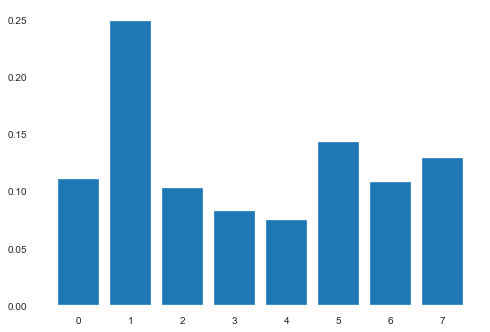

In [144]:
plt.bar([x for x in range(len(imp))],imp)
plt.show()